In [1]:
!sqlite3 -version

3.34.1 2021-01-20 14:10:07 10e20c0b43500cfb9bbc0eaa061c57514f715d87238f4d835880cd846b9ealt1


In [2]:
!sqlite3 ./internet-speed.db ".databases"

main: /home/millfort/tusur/big-data/3lab/internet-speed.db r/w


In [3]:
!test -e internet-speed.db && rm internet-speed.db
!csvsql --db sqlite:///internet-speed.db --insert LA_wifi_speed_UK.csv

/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the

In [4]:
import sqlite3
conn = sqlite3.connect('internet-speed.db')
cur = conn.cursor()

In [5]:
query = ('SELECT DateTime '
         'FROM LA_wifi_speed_UK '
         'ORDER BY DateTime ' 
         'LIMIT 10')
cur.execute(query)

In [6]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [7]:
query = ('SELECT DateTime '
         'FROM LA_wifi_speed_UK '
         'ORDER BY random() '
         'LIMIT 10')
cur.execute(query)

for row in cur:
    print(row)

('2016-12-04 13:30:00.000000',)
('2016-12-06 03:30:00.000000',)
('2016-11-25 09:00:00.000000',)
('2016-12-12 23:30:00.000000',)
('2016-12-06 23:30:00.000000',)
('2016-11-30 07:30:00.000000',)
('2016-12-11 04:00:00.000000',)
('2016-11-29 19:30:00.000000',)
('2016-11-23 13:00:00.000000',)
('2016-12-13 00:00:00.000000',)


In [8]:
query = ('SELECT * '
         'FROM LA_wifi_speed_UK '
         'LIMIT 1')
cur.execute(query)

In [9]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [10]:
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [11]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

columns = list(set(columns))

In [12]:
columns[:10]

['E07000109',
 'E06000047',
 'E07000011',
 'E07000116',
 'E07000079',
 'E07000094',
 'E06000049',
 'E07000122',
 'E07000065',
 'E06000041']

In [13]:
area = columns[0]
print(area)

E07000109


In [14]:
suffix = {'_p': 'ping', '_d': 'download', '_u': 'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000109')

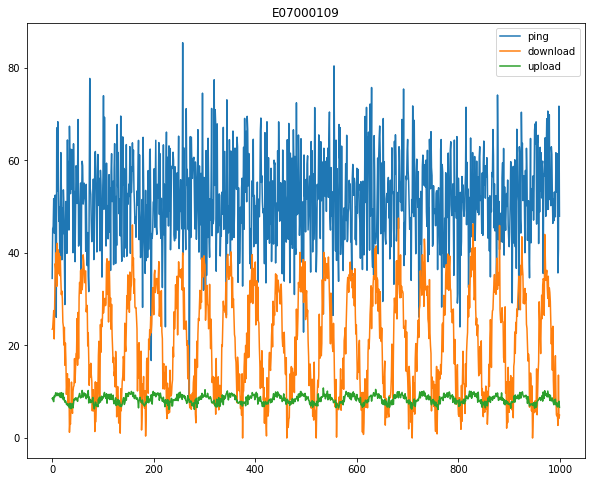

In [15]:
import matplotlib.pyplot as plt
area = columns[0]
plt.figure(figsize=(10, 8))

for s in suffix.keys():
    query = ('SELECT "{}{}" '
             'FROM LA_wifi_speed_UK '
             'ORDER BY DateTime').format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [16]:
import pandas as pd
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [17]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = ('SELECT avg("{}{}") '
                 'FROM LA_wifi_speed_UK').format(columns[i], s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
df.head()

,Area,Average_p,Average_d,Average_u
0,E07000109,51.526367,21.145699,8.393280
1,E06000047,59.622884,24.811590,9.937219
2,E07000011,53.317821,21.734956,8.631665
3,E07000116,52.587380,21.187028,8.443655
4,E07000079,51.652824,21.014710,8.334080


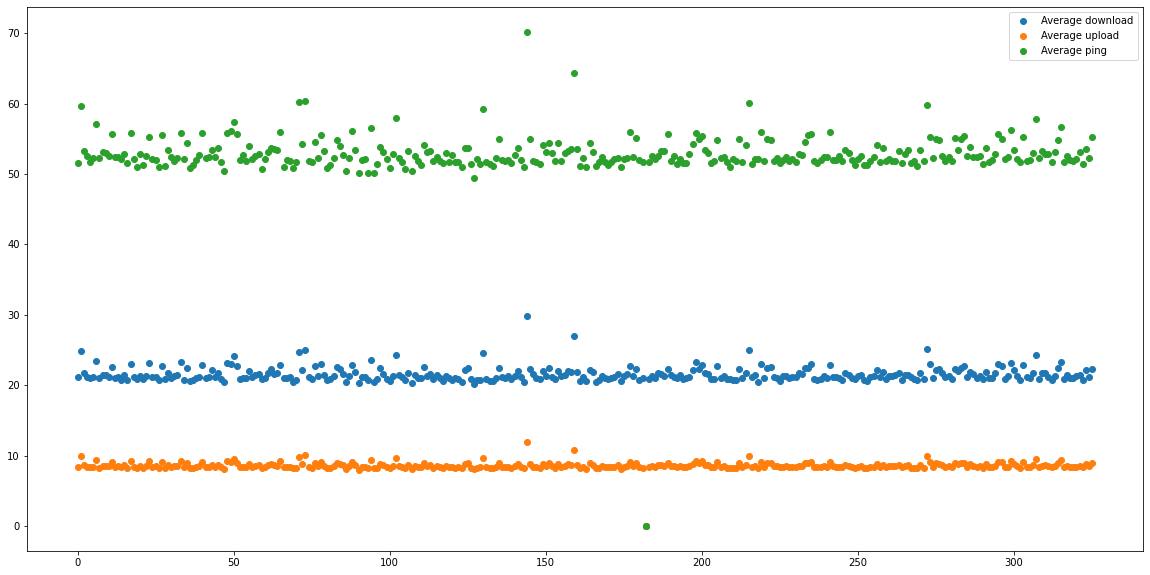

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average download', 'Average upload', 'Average ping'])

In [19]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

df.to_sql('average_speed', conn)

In [20]:
query_2 = 'SELECT * from average_speed'
cur.execute(query_2)

print(cur.fetchone())
print(cur.fetchone())

(0, 'E07000109', 51.52636748795023, 21.145699462569862, 8.393280129124895)
(1, 'E06000047', 59.62288361187973, 24.81158953506137, 9.937218789071437)


In [21]:
conn.close()

In [22]:
!csvsql --db sqlite:///internet-speed.db --insert LA_population.csv

/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
/usr/lib/python3.9/site-packages/packaging/version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the

In [23]:
conn = sqlite3.connect('internet-speed.db')
cur = conn.cursor()

In [24]:
query = ('SELECT * from LA_population '
         'LIMIT 10')
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [25]:
query = ('SELECT * '
         'FROM average_speed '
         'JOIN LA_population '
         'ON LA_population."LA_code"=average_speed.Area')
cur.execute(query)
k = 0
for row in cur:
    if k > 10:
        break
    print(row)
    k += 1

(0, 'E07000109', 51.52636748795023, 21.145699462569862, 8.393280129124895, 'Gravesham', 'E07000109', 101720.0)
(1, 'E06000047', 59.62288361187973, 24.81158953506137, 9.937218789071437, 'County Durham', 'E06000047', 513242.0)
(2, 'E07000011', 53.31782141019556, 21.73495550144484, 8.631665159377741, 'Huntingdonshire', 'E07000011', 169508.0)
(3, 'E07000116', 52.58738016162416, 21.18702771257326, 8.443655390781311, 'Tunbridge Wells', 'E07000116', 115049.0)
(4, 'E07000079', 51.652824041416515, 21.014709814036717, 8.334080367312556, 'Cotswold', 'E07000079', 82881.0)
(5, 'E07000094', 52.236408904251086, 21.220158212642453, 8.432513187192598, 'Winchester', 'E07000094', 116595.0)
(6, 'E06000049', 57.11893112511649, 23.48272682151498, 9.38933695300067, 'Cheshire East', 'E06000049', 370127.0)
(7, 'E07000122', 52.23284891564401, 20.966287498205027, 8.31218342667357, 'Pendle', 'E07000122', 89452.0)
(8, 'E07000065', 53.172878756484934, 21.52091962985959, 8.563741632671771, 'Wealden', 'E07000065', 14

In [27]:
import seaborn as sns

In [28]:
df = pd.read_sql(query, con=conn)

In [29]:
df.head()

,index,Area,Average_p,Average_d,Average_u,LA,LA_code,Total_Population
0,0,E07000109,51.526367,21.145699,8.393280,Gravesham,E07000109,101720.0
1,1,E06000047,59.622884,24.811590,9.937219,County Durham,E06000047,513242.0
2,2,E07000011,53.317821,21.734956,8.631665,Huntingdonshire,E07000011,169508.0
3,3,E07000116,52.587380,21.187028,8.443655,Tunbridge Wells,E07000116,115049.0
4,4,E07000079,51.652824,21.014710,8.334080,Cotswold,E07000079,82881.0


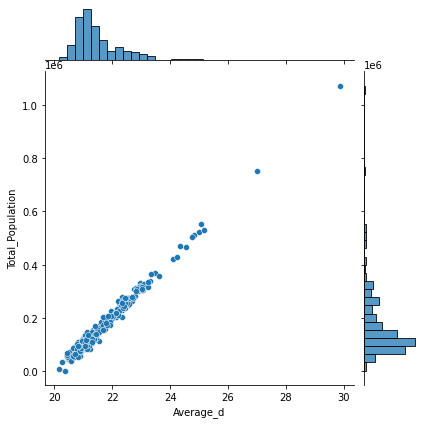

In [30]:
sns.jointplot(data=df, x='Average_d', y='Total_Population')